## Author: Ranjan Mukesh Borkar

# Task 3

# Exploratory Data Analysis - Retail
**We need to perform Exploratory Data Analysis on the dataset SampleSuperstore and find out the areas where we can work to increase profit.**

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Importing the required libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset SampleSuperstore in the dataframe dataset

In [3]:
dataset = pd.read_csv('SampleSuperstore.csv')
dataset.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
print('The shape of the given dataset is: {}'.format(dataset.shape))

The shape of the given dataset is: (9994, 13)


So we have 9994 rows and 13 columns.Now, we can see that Postal code of a Region wouldn't add any value to our dataset so we get rid of the column 'Postal Code'.

## Data Cleaning 
Here we look for null data, duplicate data, redundant columns and drop them.

In [5]:
dataset.drop('Postal Code', axis = 1, inplace = True)

In [6]:
dataset.isnull().sum(axis = 0)

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
dataset[dataset.duplicated()].shape[0]

50

In [8]:
dataset.drop_duplicates(inplace = True)
print('The shape of the corrected dataset is: {}'.format(dataset.shape))

The shape of the corrected dataset is: (9944, 12)


We do some basic functions to see the correlation and few statistical measures of numeric columns.

In [9]:
dataset.describe()

,Sales,Quantity,Discount,Profit
count,9944.000000,9944.000000,9944.000000,9944.000000
mean,230.752150,3.794047,0.156440,28.770873
std,624.644765,2.228752,0.206584,234.841370
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.340000,2.000000,0.000000,1.724800
50%,55.000000,3.000000,0.200000,8.679950
75%,210.104000,5.000000,0.200000,29.534700
max,22638.480000,14.000000,0.800000,8399.976000


In [10]:
dataset.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


As expected the correlation between the discount and profit comes out to be negative. We also find that sales and profit have a strongs correlation. 

Let us see how many unique values we have for each column this can help us realize what we shoud use for our analysis. Too many unique values will become to complex to visualize. So, we will visualize with limited columns to derive meaningful conclusions.

In [11]:
dataset.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## Visualizing heatmap for the correlation dataset. 
This will give us some idea about how the numerical column depend on each other.

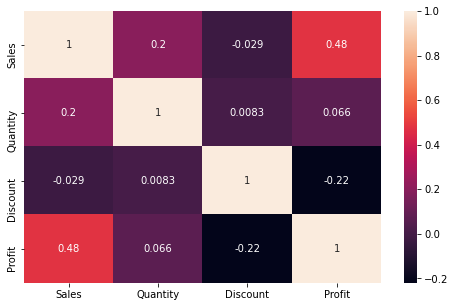

In [12]:
fig, axes = plt.subplots(1,1, figsize = (8,5))
sns.heatmap(dataset.corr(), annot = True)
plt.show()

We see that profit and sale have strong correlation, Discount and Profit have acceptable negative correlation.

### Visualization by Pairplot

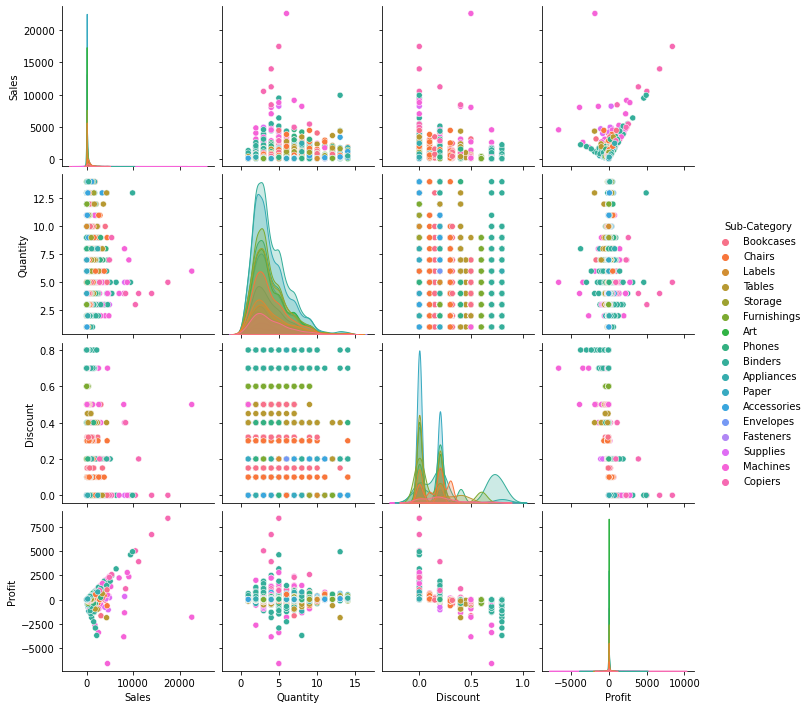

In [13]:
sns.pairplot(dataset, hue = 'Sub-Category')

Relation plot between sales and profit as per the region.

<Figure size 1080x720 with 0 Axes>

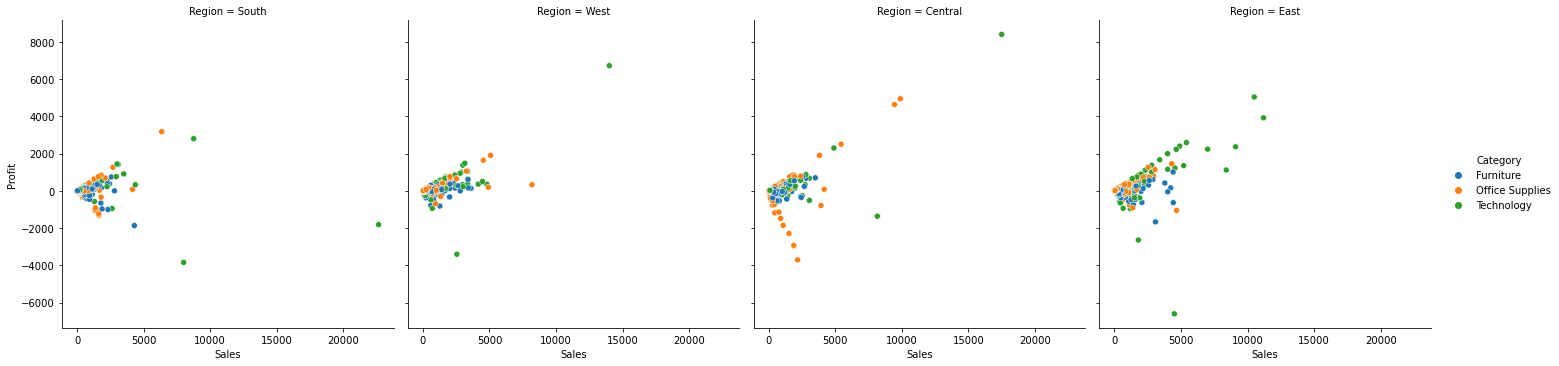

In [14]:
plt.figure(figsize = (15,10))
sns.relplot(x = 'Sales', y = 'Profit', hue='Category', data=dataset, col='Region')

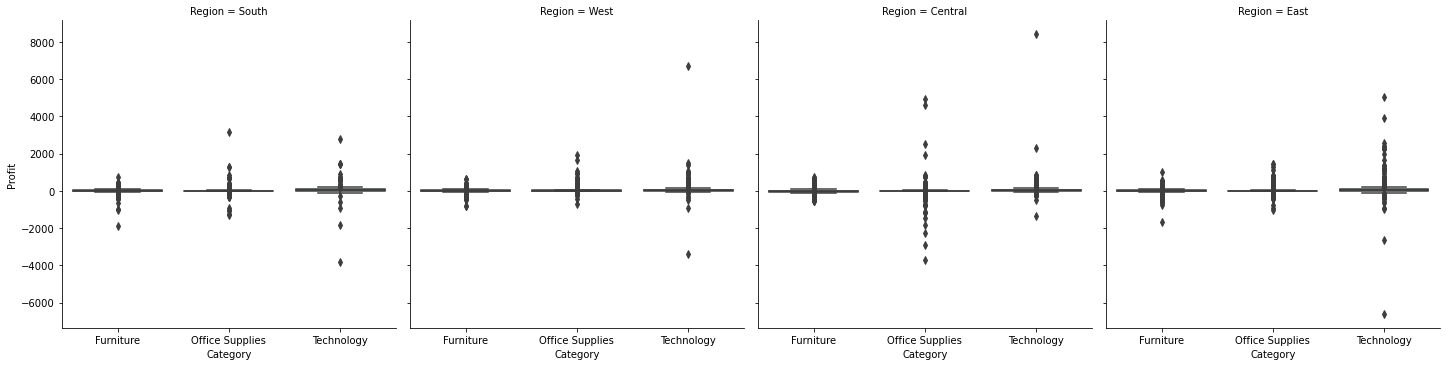

In [15]:
sns.catplot(x='Category',y='Profit',data=dataset, col="Region", kind="box")

We see we have different columns over which we can relate the profit, sales and discount. Here, we usse the Ship Mode column to see how the profit and sales are distributed over the Ship modes.

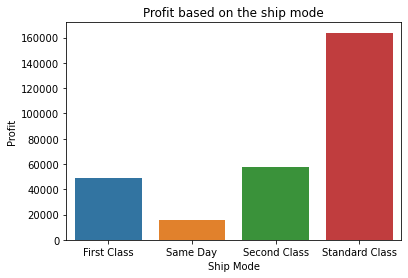

In [16]:
ship_mode = dataset.groupby(['Ship Mode'], as_index = False)['Profit','Sales'].sum()
sns.barplot(ship_mode['Ship Mode'], ship_mode['Profit'])
plt.title('Profit based on the ship mode')
plt.show()

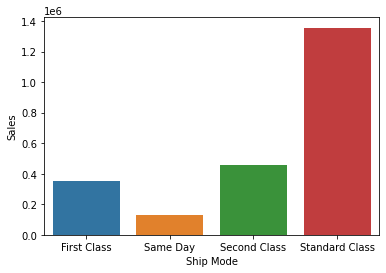

In [17]:
sns.barplot(ship_mode['Ship Mode'], ship_mode['Sales'])
plt.show()

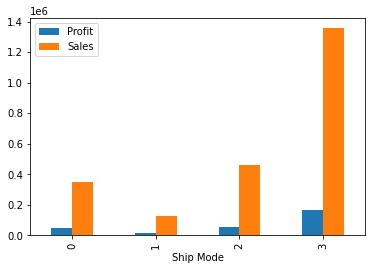

In [18]:
ship_mode.plot(kind= 'bar')
plt.xlabel('Ship Mode')
plt.show()

We see we have maximum sales in the standard class and the lowest profit to sales in the standard class. We can indeed try to make more profit in the standard class. To get more sales in the first class and second class we can try to give a little more discount. This will potentially decrease our profits in those classes too.


Now, let us quickly see how the profit and sales are distributed over the regions. 

<AxesSubplot:xlabel='Region', ylabel='Profit'>

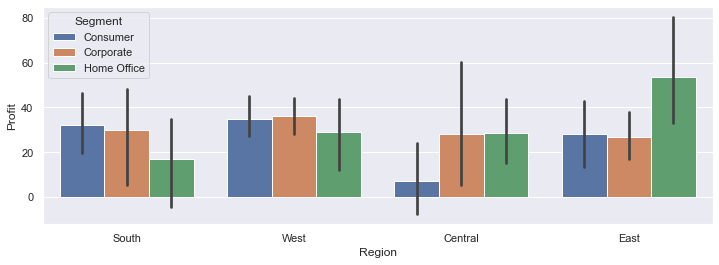

In [19]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1)
sns.barplot(x = "Region",y = "Profit" ,hue = "Segment", data = dataset)

<AxesSubplot:xlabel='Region', ylabel='Sales'>

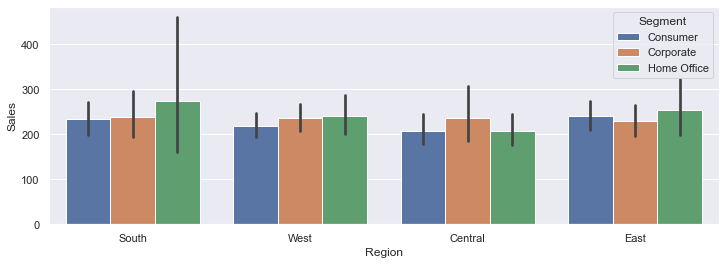

In [20]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1)
sns.barplot(x = "Region",y = "Sales" ,hue = "Segment", data = dataset)

We see that although thea sales are good the central region has low profit. This can be one of the areas where we can reasearch if a problem is there.

Now, we will see as per the states. We note that we only have one country so we do not have to worry about country column and we can safely groupby states and check profit, sales and discount.

<AxesSubplot:xlabel='State'>

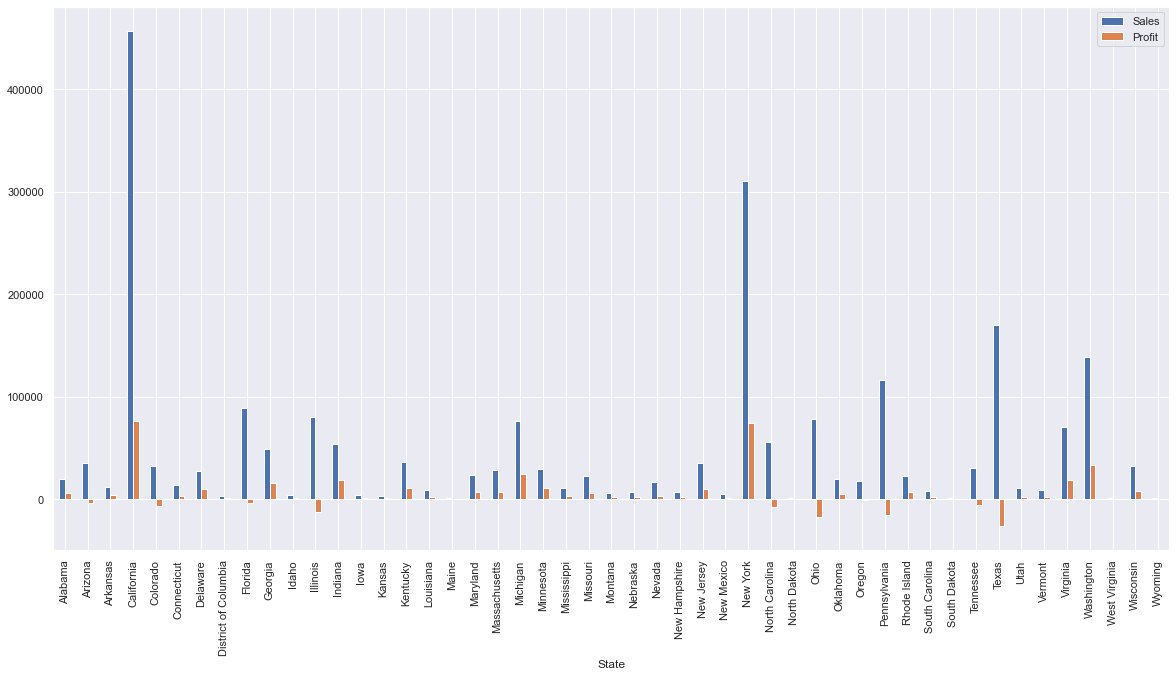

In [21]:
state_df = dataset.groupby(['State'])['Sales', 'Profit'].sum()
state_df.plot.bar(figsize = (20,10))

From the above plot we can see that we have negative profits in some states we proceed to make a bigger plot to find which states those are-

Plotting sales with states:

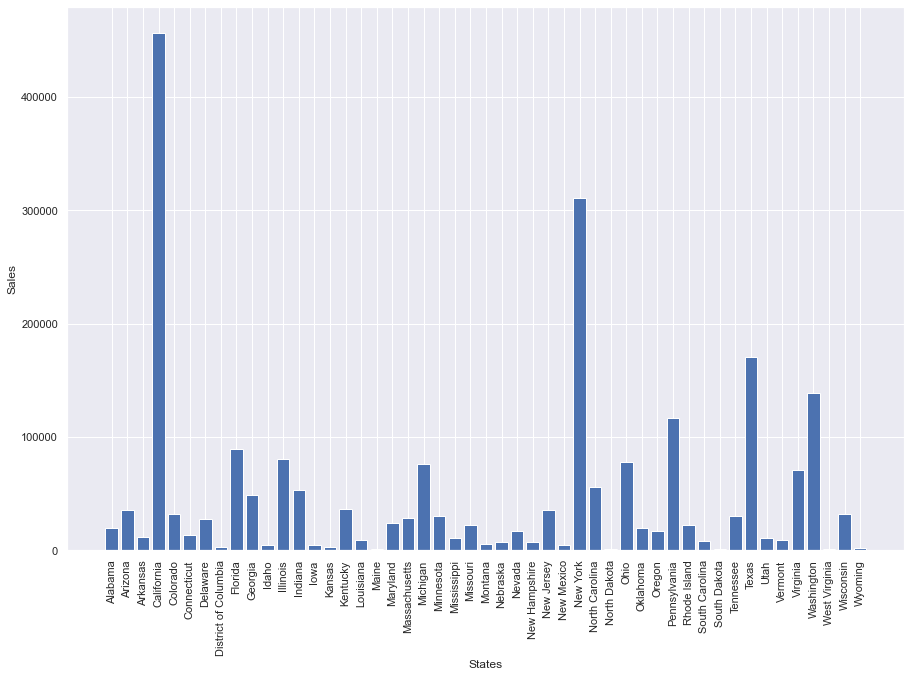

In [22]:
state_sales = dataset.groupby(['State']).Sales.sum()
plt.figure(figsize = (15,10))
plt.bar(state_sales.index, state_sales)
plt.xlabel('States')
plt.ylabel('Sales')
plt.xticks(rotation = 90)
plt.show()

Plotting profit with states:

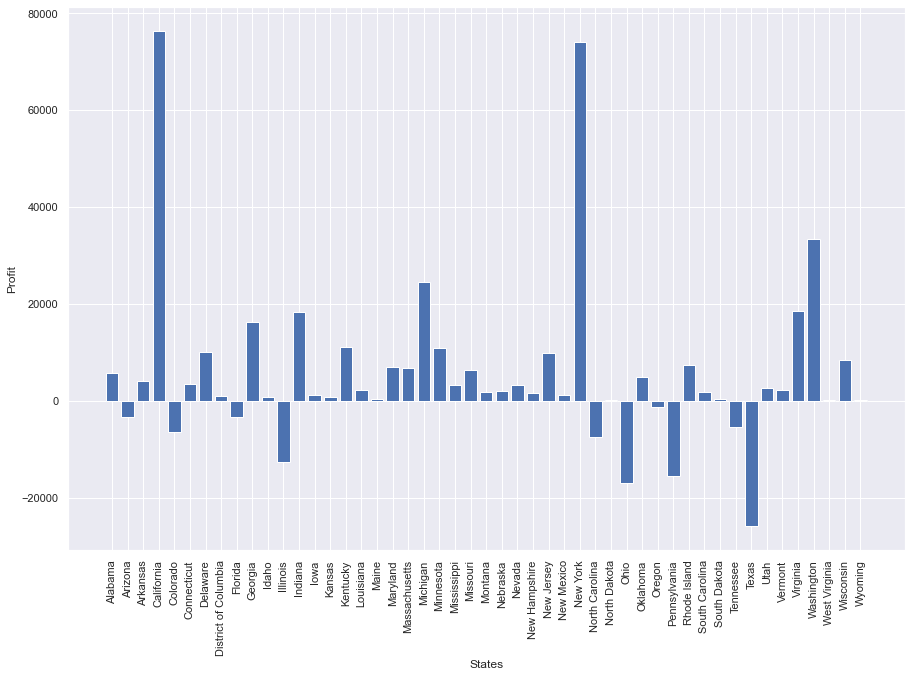

In [23]:
state_profit = dataset.groupby(['State']).Profit.sum()
plt.figure(figsize = (15,10))
plt.bar(state_profit.index, state_profit)
plt.xlabel('States')
plt.ylabel('Profit')
plt.xticks(rotation = 90)
plt.show()

Plotting discount with states:

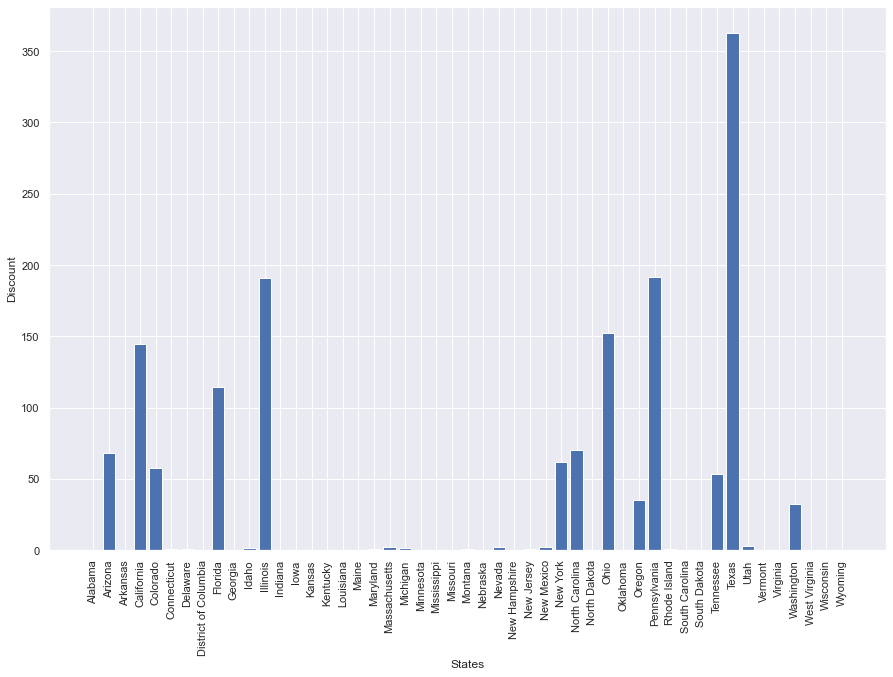

In [24]:
state_discount = dataset.groupby(['State']).Discount.sum()
plt.figure(figsize = (15,10))
plt.bar(state_discount.index, state_discount)
plt.xlabel('States')
plt.ylabel('Discount')
plt.xticks(rotation = 90)
plt.show()

## Conclusions:
1. We see we are suffering huge losses in states - Texas, Chio, Pennysylvania, Illinois. There are more states those are suffering losses but we should first focus on states that have major losses.
2. We see from the discounts plot that we are giving very high discount in Texas, Chio, Pennysylvania and Illinois. We should consider reducing these discounts if we want a profit. We also see that the states those are suffering from losses have discounts as a culprit so we should balance discounts and profit in these areas.
3. From Sales and Profit graph of Regions we come to a conclusion that the central region is having really low profit for the sales it has. So, we should consider looking into the central region as well.
4. From the catplot we can see that for the central region we should definitely look into the office supplies category as we are suffering most losses there.
5. I also suggest to invest in Technology more as it shows a promisiong way to increase profits exponentially.

## This concludes our analysis for this task.
### Important Links: 
[GitHub](https://github.com/xxrocripxx/TheSparksFoundation)
[YouTube](https://www.youtube.com/channel/UCoFutkgRXGpHbZm8VnJp69Q)
[LinkedIn](https://www.linkedin.com/in/ranjan-borkar-88782215b/)